In [74]:
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pylab as plt

import time

import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [7]:
t1 = time.time()

mnist_train_data_path = 'C:/dev/info file/01_MNIST_Kaggle_data/train.csv'

train = np.genfromtxt(mnist_train_data_path, delimiter=',',skip_header=1).astype(np.dtype('uint8'))

t2 = time.time()

print('Process Time : '+str(t2-t1))
print(train)

Process Time : 20.735530614852905
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [8]:
t1 = time.time()

mnist_test_data_path = 'C:/dev/info file/01_MNIST_Kaggle_data/test.csv'

test = np.genfromtxt(mnist_test_data_path, delimiter=',',skip_header=1).astype(np.dtype('uint8'))

t2 = time.time()

print('Process Time : '+str(t2-t1))
print(test)

Process Time : 13.593597888946533
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
# 각 건수

print(len(train))
print(len(test))

42000
28000


In [10]:
train.shape #마지막에는 타겟 정보임을 알 수 있다

(42000, 785)

In [17]:
train_data = train[:,1:]
train_labels = train[:,0]


In [38]:
test.shape

(28000, 784)

In [19]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [15]:
import seaborn as sns

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

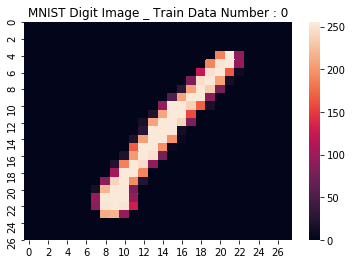

In [22]:
idx = 0
image_data = train_data[idx]

# 1차원으로 되어있기 때문에 1차원 길이값 및 2차원 길이값 확인
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size))) #heatmap depth로 진하기를 확인할 수 있음
plt.title(str('MNIST Digit Image _ Train Data Number : ')+str(idx))

In [16]:
from sklearn.neighbors import KNeighborsClassifier   # sklearn.neighbors kn분류모델
from sklearn.metrics import accuracy_score          # 단순 정확도만 확인
from sklearn.model_selection import cross_val_score

In [24]:
t1 = time.time()

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(train_data, train_labels)

pred = knn.predict(test)


t2 = time.time()
print('Process Time : '+str(t2-t1))

Process Time : 239.41051149368286


In [ ]:
#imageId, Label 예측한 값들을 기록해서 캐글에 올리는거

In [28]:
img_id = []
for i in range(1, len(test)+1) :
    img_id.append(i)
    
predMNIST = pd.DataFrame({'ImageId':img_id,'Label':pred})

out_path = 'C:/dev/pythonWorkspace/2020-01-21/out2.csv'
predMNIST.to_csv(out_path, index=False)


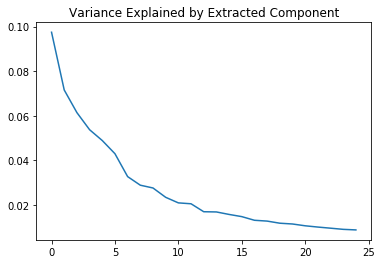

In [33]:
num_comp = 25 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Component')
plt.show()

In [54]:
num_comp = 25 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

train_ext = pca.fit_transform(train_data) # 훈련셋에는 fit으로 잘라서 바로 훈련하는 내용임
#print(train_ext.shape)

test_ext = pca.transform(test) # test에는 훈련하지 않으니까 fit 하지 않음
#print(test_ext.shape)

min_max_scaler = MinMaxScaler()

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

cross_val_score(knn,train_norm, train_labels,cv=5).mean()

0.9692615538831344

In [55]:
train_ext.shape

(42000, 25)

In [ ]:
# 1. 처음 제출한 결과 score 캡쳐
# 2. 성능이 향상된 score 캡쳐

In [53]:
t1 = time.time()
#모델세팅

# empty ist that will hold cv scores

cv_scores = []

# cv 10 내부로 나눈 걸 cv 갯수(10), 평가기준표 accuracy
for k in range(1,10,2) :
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, train_data, train_labels, cv=5, scoring='accuracy')
    
    cv_scores.append(scores.mean())
    print(scores.mean())
    
    
t2 = time.time()
print('Process Time : '+str(t2-t1))

0.9662380272466706
0.9666900598034418
0.9658569700264943
0.9647619584646627
0.9632617626161446
Process Time : 1640.573851108551


In [ ]:
# pca로 자르고,
# 각각에 대해서 돌려본다


In [58]:
components = list(range(20,55,1))
neighbors = list(range(1,15,2))


In [56]:
components = list(range(20,23,1))
neighbors = list(range(1,3,2))

In [59]:
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = num_comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=3, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)
        

comp =  20 , nei =  1 , scores =  0.9644047774564767
comp =  20 , nei =  3 , scores =  0.9654998761605434
comp =  20 , nei =  5 , scores =  0.9642142332407303
comp =  20 , nei =  7 , scores =  0.9629047263821384
comp =  20 , nei =  9 , scores =  0.9614525256168518
comp =  20 , nei =  11 , scores =  0.9596429269142338
comp =  20 , nei =  13 , scores =  0.9580476649477694
comp =  21 , nei =  1 , scores =  0.9644047774564767
comp =  21 , nei =  3 , scores =  0.9654998761605434
comp =  21 , nei =  5 , scores =  0.9642142332407303
comp =  21 , nei =  7 , scores =  0.9629047263821384
comp =  21 , nei =  9 , scores =  0.9614525256168518
comp =  21 , nei =  11 , scores =  0.9596429269142338
comp =  21 , nei =  13 , scores =  0.9580476649477694
comp =  22 , nei =  1 , scores =  0.9644047774564767
comp =  22 , nei =  3 , scores =  0.9654998761605434
comp =  22 , nei =  5 , scores =  0.9642142332407303
comp =  22 , nei =  7 , scores =  0.9629047263821384
comp =  22 , nei =  9 , scores =  0.961452

KeyboardInterrupt: 

In [63]:
components = list(range(30,40,1))
neighbors = list(range(5,9,2))

In [65]:
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=3, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  30 , nei =  5 , scores =  0.968380740236323
comp =  30 , nei =  7 , scores =  0.9671903694243831
comp =  31 , nei =  5 , scores =  0.968214325227593
comp =  31 , nei =  7 , scores =  0.9675000496867815
comp =  32 , nei =  5 , scores =  0.9682142129987232
comp =  32 , nei =  7 , scores =  0.9668333489841593
comp =  33 , nei =  5 , scores =  0.9685953014302161
comp =  33 , nei =  7 , scores =  0.9672143353894072
comp =  34 , nei =  5 , scores =  0.9679523218296294
comp =  34 , nei =  7 , scores =  0.9672143047815335
comp =  35 , nei =  5 , scores =  0.9679999986940642
comp =  35 , nei =  7 , scores =  0.9668810156459696
comp =  36 , nei =  5 , scores =  0.9671191755104037
comp =  36 , nei =  7 , scores =  0.9663334305847503
comp =  37 , nei =  5 , scores =  0.9668809952407204
comp =  37 , nei =  7 , scores =  0.9654048795235326
comp =  38 , nei =  5 , scores =  0.96657146801769
comp =  38 , nei =  7 , scores =  0.9653810053821292
comp =  39 , nei =  5 , scores =  0.96645231156578

In [66]:
components = list(range(30,40,1))
neighbors = list(range(9,10,2))

In [67]:
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=3, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  30 , nei =  9 , scores =  0.966380740154702
comp =  31 , nei =  9 , scores =  0.9663570496605404
comp =  32 , nei =  9 , scores =  0.9666191448821247
comp =  33 , nei =  9 , scores =  0.9660477366926251
comp =  34 , nei =  9 , scores =  0.9660952197071936
comp =  35 , nei =  9 , scores =  0.9657618285453845
comp =  36 , nei =  9 , scores =  0.9646190631795076
comp =  37 , nei =  9 , scores =  0.9641904815308214
comp =  38 , nei =  9 , scores =  0.96388097471304
comp =  39 , nei =  9 , scores =  0.9633571617669787


In [82]:
components = list(range(30,37,1))
neighbors = list(range(3,10,2))

In [81]:
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  30 , nei =  3 , scores =  0.9704044395501177
comp =  30 , nei =  5 , scores =  0.9703092043059017
comp =  30 , nei =  7 , scores =  0.9687614659677092
comp =  30 , nei =  9 , scores =  0.9684520809887285
comp =  31 , nei =  3 , scores =  0.9708329373385265
comp =  31 , nei =  5 , scores =  0.9707379090006775
comp =  31 , nei =  7 , scores =  0.9695474892815834
comp =  31 , nei =  9 , scores =  0.9679761596914801
comp =  32 , nei =  3 , scores =  0.9709758399030537
comp =  32 , nei =  5 , scores =  0.9708093433166178
comp =  32 , nei =  7 , scores =  0.9688097028894951
comp =  32 , nei =  9 , scores =  0.96773818908968
comp =  33 , nei =  3 , scores =  0.9709283284869226
comp =  33 , nei =  5 , scores =  0.9704761543721017
comp =  33 , nei =  7 , scores =  0.9690002584059265
comp =  33 , nei =  9 , scores =  0.9677858478124302
comp =  34 , nei =  3 , scores =  0.9705235013614436
comp =  34 , nei =  5 , scores =  0.9702618289563787
comp =  34 , nei =  7 , scores =  0.968738138291

In [83]:
# 2번 중첩 러닝
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  30 , nei =  3 , scores =  0.9704758908020255
comp =  30 , nei =  5 , scores =  0.970261432195015
comp =  30 , nei =  7 , scores =  0.9689755929936454
comp =  30 , nei =  9 , scores =  0.9684044279274948
comp =  31 , nei =  3 , scores =  0.970713952066984
comp =  31 , nei =  5 , scores =  0.9706427332347193
comp =  31 , nei =  7 , scores =  0.9693332885831174
comp =  31 , nei =  9 , scores =  0.9680237956811221
comp =  32 , nei =  3 , scores =  0.9714282662710284
comp =  32 , nei =  5 , scores =  0.9709523393750537
comp =  32 , nei =  7 , scores =  0.969047860495319
comp =  32 , nei =  9 , scores =  0.9678096488277749
comp =  33 , nei =  3 , scores =  0.9708331017511579
comp =  33 , nei =  5 , scores =  0.970476103392161
comp =  33 , nei =  7 , scores =  0.9691906241564047
comp =  33 , nei =  9 , scores =  0.9676193115346587
comp =  34 , nei =  3 , scores =  0.9705710722173695
comp =  34 , nei =  5 , scores =  0.9705475404720681
comp =  34 , nei =  7 , scores =  0.96869061839366

In [84]:
# 3번 중첩 러닝
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        knn.fit(train_norm, train_labels)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  30 , nei =  3 , scores =  0.9704758737911636
comp =  30 , nei =  5 , scores =  0.970475746320095
comp =  30 , nei =  7 , scores =  0.9691424098887793
comp =  30 , nei =  9 , scores =  0.9684758707114112
comp =  31 , nei =  3 , scores =  0.9707852757728881
comp =  31 , nei =  5 , scores =  0.9704283454330337
comp =  31 , nei =  7 , scores =  0.9693570187667904
comp =  31 , nei =  9 , scores =  0.9682142350859273
comp =  32 , nei =  3 , scores =  0.9711662792289374
comp =  32 , nei =  5 , scores =  0.9705237961953384
comp =  32 , nei =  7 , scores =  0.9690002130733341
comp =  32 , nei =  9 , scores =  0.9679049265859924
comp =  33 , nei =  3 , scores =  0.9707854174949198
comp =  33 , nei =  5 , scores =  0.970452359050659
comp =  33 , nei =  7 , scores =  0.9694763979851782
comp =  33 , nei =  9 , scores =  0.9678811426321097
comp =  34 , nei =  3 , scores =  0.970261568206942
comp =  34 , nei =  5 , scores =  0.9698333424909913
comp =  34 , nei =  7 , scores =  0.9688572028935

In [85]:
components = list(range(33,37,1))
neighbors = list(range(3,10,2))

# n번 중첩 러닝
n = 10
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        for i in range(n) :
            knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  33 , nei =  3 , scores =  0.9707853693093206
comp =  33 , nei =  5 , scores =  0.9702380846270108
comp =  33 , nei =  7 , scores =  0.9691431892881344
comp =  33 , nei =  9 , scores =  0.9677620212838457
comp =  34 , nei =  3 , scores =  0.9705710466939959
comp =  34 , nei =  5 , scores =  0.970166619184899
comp =  34 , nei =  7 , scores =  0.9689764290890771
comp =  34 , nei =  9 , scores =  0.9675715848150486
comp =  35 , nei =  3 , scores =  0.9701187960637043
comp =  35 , nei =  5 , scores =  0.9698808594734769
comp =  35 , nei =  7 , scores =  0.9684762249365428
comp =  35 , nei =  9 , scores =  0.967047525747416
comp =  36 , nei =  3 , scores =  0.9701189746199773
comp =  36 , nei =  5 , scores =  0.9697381270397551
comp =  36 , nei =  7 , scores =  0.9681189687114754
comp =  36 , nei =  9 , scores =  0.9665712983721884


In [87]:
train_norm.shape

(42000, 33)

In [77]:
(train_data_val, test_data_val, train_labels_val, test_labels_val) = train_test_split(np.array(train_data), train_labels,
                                                                     test_size=0.25, random_state=1234)


In [ ]:
components = list(range(30,37,1))
neighbors = list(range(3,10,2))

In [ ]:
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    train_ext = pca.fit_transform(train_data_val)
#    test_ext = pca.transform(test)
    
    train_norm = min_max_scaler.fit_transform(train_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        knn.fit(train_norm, train_labels)
        scores = cross_val_score(knn, train_norm, train_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

In [ ]:
min_max_scaler = MinMaxScaler()
train_norm_val = min_max_scaler.fit_transform(train_data_val)
test_norm_val = min_max_scaler.fit_transform(test_data_val)

In [98]:
train.shape

(42000, 785)

In [95]:
newTrain = np.array([])

In [102]:
newTrain = np.append(newTrain, train)

In [104]:
newTrain = newTrain.reshape(126000,785)

In [105]:
newTrain.shape

(126000, 785)

In [ ]:
multiTrain = np.array([])
multi = 3
for m in range(multi) :
    multiTrain = np.append(multiTrain, train)
multiTrain = multiTrain.reshape(42000*multi,785)

In [106]:
newTrain_data = newTrain[:,1:]
newTrain_labels = newTrain[:,0]

In [108]:
# 데이터중첩 3배

components = list(range(33,37,1))
neighbors = list(range(3,10,2))

# n번 중첩 러닝
n = 1
min_max_scaler = MinMaxScaler()

for comp in components :
    pca = PCA(n_components = comp)
    newTrain_ext = pca.fit_transform(newTrain_data)
#    test_ext = pca.transform(test)
    
    newTrain_norm = min_max_scaler.fit_transform(newTrain_ext)
#    test_norm = min_max_scaler.fit_transform(test_ext)
    
    for nei in neighbors :
        knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)
        for i in range(n) :
            knn.fit(newTrain_norm, newTrain_labels)
        scores = cross_val_score(knn, newTrain_norm, newTrain_labels, cv=5, scoring='accuracy').mean()
        print('comp = ',comp,', nei = ',nei,', scores = ',scores)

comp =  33 , nei =  3 , scores =  1.0
comp =  33 , nei =  5 , scores =  0.9813651131107737
comp =  33 , nei =  7 , scores =  0.9866190392352324
comp =  33 , nei =  9 , scores =  0.9825317161708709
comp =  34 , nei =  3 , scores =  1.0


KeyboardInterrupt: 

In [116]:

num_comp = 35
nei = 7
n = 1
multi = 2

min_max_scaler = MinMaxScaler()

# 데이터 중첩러닝
multiTrain = np.array([])
for m in range(multi) :
    multiTrain = np.append(multiTrain, train)
multiTrain = multiTrain.reshape(42000*multi,785)

multiTrain_data = multiTrain[:,1:]
multiTrain_labels = multiTrain[:,0]

pca = PCA(n_components = num_comp)
train_ext = pca.fit_transform(multiTrain_data)
test_ext = pca.transform(test)

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier(n_neighbors=nei, n_jobs=-1)

# 중첩러닝
for i in range(n) :
    knn.fit(train_norm, multiTrain_labels)
    
pred = knn.predict(test_norm)
        
img_id = []
for i in range(1, len(test)+1) :
    img_id.append(i)
    
predMNIST = pd.DataFrame({'ImageId':img_id,'Label':pred.astype('uint8')})

out_path = 'C:/dev/pythonWorkspace/2020-01-21/out11_'+str(num_comp)+'_'+str(nei)+'_'+str(n)+'_'+str(multi)+'.csv'
predMNIST.to_csv(out_path, index=False)


In [110]:
pred.shape

(28000,)

In [111]:
pred.astype('uint8')

array([2, 0, 9, ..., 3, 9, 2], dtype=uint8)

In [ ]:
num_comp = 25 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

pca.fit(train_data)

train_ext = pca.fit_transform(train_data) # 훈련셋에는 fit으로 잘라서 바로 훈련하는 내용임
#print(train_ext.shape)

test_ext = pca.transform(test) # test에는 훈련하지 않으니까 fit 하지 않음
#print(test_ext.shape)

min_max_scaler = MinMaxScaler()

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier()
knn.fit(train_norm, train_labels)

cross_val_score(knn,train_norm, train_labels,cv=5).mean()
